In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
df = pd.read_csv(r'Stress.csv')
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [35]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [36]:
df['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

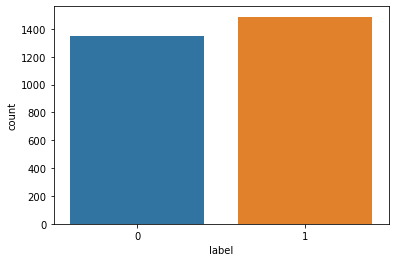

In [37]:
sns.countplot(x=df["label"])

In [38]:
df.shape

(2838, 7)

In [39]:
dfs = df[["text", "label"]]
dfs

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dfs["text"],dfs["label"],test_size=0.2)

In [41]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2270,) (568,) (2270,) (568,)


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [43]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [44]:
model = clf.fit(X_train, Y_train)

In [45]:
import joblib

In [46]:
joblib.dump(clf, 'MultinomialNB_stress.pkl')

['MultinomialNB_stress.pkl']

In [47]:
print("Accuracy is:",model.score(X_train,Y_train))
print("Accuracy is:",model.score(X_test,Y_test))

Accuracy is: 0.8766519823788547
Accuracy is: 0.6584507042253521


In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(dfs["text"],dfs["label"],test_size=0.2)

In [49]:
from sklearn.naive_bayes import BernoulliNB

In [50]:
clf1 = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', BernoulliNB()),
    ])

In [51]:
model =clf1.fit(X_train, Y_train)

In [52]:
print("Accuracy is:",model1.score(X_train,Y_train))
print("Accuracy is:",model1.score(X_test,Y_test))

Accuracy is: 0.8916299559471366
Accuracy is: 0.9137323943661971


In [53]:
joblib.dump(clf, 'BernoulliNB_stress.pkl')

['BernoulliNB_stress.pkl']

In [54]:
clf = joblib.load('BernoulliNB_stress.pkl')

In [64]:
# Sample text data for prediction
sample_text = "Hey there r/assistance, Not sure if this is th...	"

In [65]:
# Predict using the loaded model
predicted_label = clf.predict([sample_text])[0]

In [66]:
# Print the predicted label
print(predicted_label)

0
